In [1]:
from einops import rearrange, repeat, reduce
import torch

<h4>1) Transpose</h4>

In [2]:
y_torch = torch.randn(2,3,1,4)
y_einops = y_torch

In [3]:
y_torch

tensor([[[[-0.3177, -0.2416, -1.3253,  0.1360]],

         [[-0.2222, -0.0660, -0.0455, -0.3678]],

         [[ 0.1957, -2.1639, -0.2480,  0.5044]]],


        [[[-1.3404,  0.2631, -0.0520, -1.4049]],

         [[ 0.4965, -0.8957, -0.0861,  0.6155]],

         [[-0.6346, -1.1928,  0.3877,  1.6353]]]])

In [4]:
y_torch = y_torch.permute(3,1,0,2)
y_torch

tensor([[[[-0.3177],
          [-1.3404]],

         [[-0.2222],
          [ 0.4965]],

         [[ 0.1957],
          [-0.6346]]],


        [[[-0.2416],
          [ 0.2631]],

         [[-0.0660],
          [-0.8957]],

         [[-2.1639],
          [-1.1928]]],


        [[[-1.3253],
          [-0.0520]],

         [[-0.0455],
          [-0.0861]],

         [[-0.2480],
          [ 0.3877]]],


        [[[ 0.1360],
          [-1.4049]],

         [[-0.3678],
          [ 0.6155]],

         [[ 0.5044],
          [ 1.6353]]]])

In [5]:
y_einops = rearrange(y_einops, 'b t c h -> h t b c')

In [6]:
y_einops

tensor([[[[-0.3177],
          [-1.3404]],

         [[-0.2222],
          [ 0.4965]],

         [[ 0.1957],
          [-0.6346]]],


        [[[-0.2416],
          [ 0.2631]],

         [[-0.0660],
          [-0.8957]],

         [[-2.1639],
          [-1.1928]]],


        [[[-1.3253],
          [-0.0520]],

         [[-0.0455],
          [-0.0861]],

         [[-0.2480],
          [ 0.3877]]],


        [[[ 0.1360],
          [-1.4049]],

         [[-0.3678],
          [ 0.6155]],

         [[ 0.5044],
          [ 1.6353]]]])

<h5>1.2) Numpy</h5>

In [7]:
# Examples are given for numpy. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
import numpy as np
from diplay_image import display_np_arrays_as_images
display_np_arrays_as_images()

In [8]:
ims = np.load('docs/test_images.npy', allow_pickle=False)

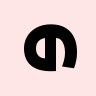

In [9]:
rearrange(ims[0], 'h w c -> w h c')

<h5>Composition of Axes</h5>

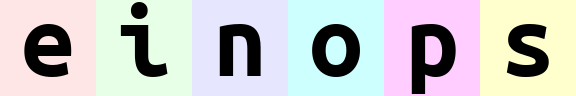

In [10]:
rearrange(ims, 'b h w c -> h (b w) c')

In [11]:
#flattening
rearrange(ims, 'b h w c -> (h b w c)').shape

(165888,)

<h5>Decomposition of axis</h5>

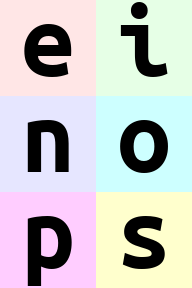

In [12]:
#decomposing the batch dimension
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', b1=3)

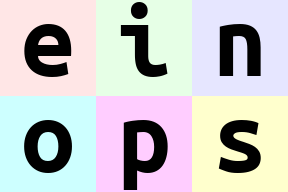

In [13]:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', b1=2)

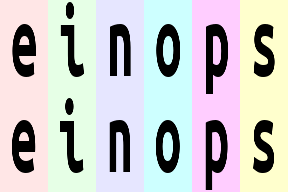

In [14]:
rearrange(ims, 'b h (w w1) c -> (w1 h) (b w) c', w1=2)

<h5>Order of axes matters</h5>

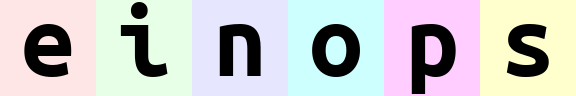

In [15]:
rearrange(ims, 'b h w c -> h (b w) c')

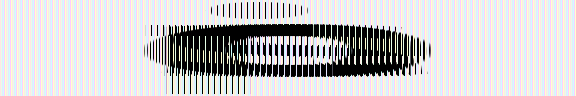

In [16]:
# order of axes in composition is different
# rule is just as for digits in the number: leftmost digit is the most significant, 
# while neighboring numbers differ in the rightmost axis.

# you can also think of this as lexicographic sort
rearrange(ims, 'b h w c -> h (w b) c')

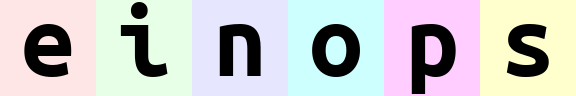

In [17]:
rearrange(ims, '(b1 b2) h w c -> h (b1 b2 w) c', b1=2)

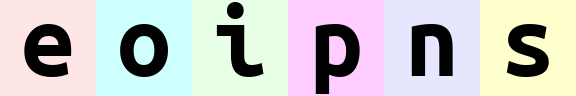

In [18]:
rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c', b1=2)

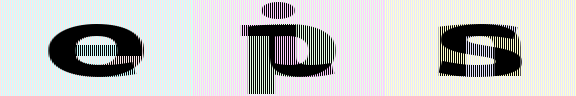

In [19]:
rearrange(ims, '(b1 b2) h w c -> h (b2 w b1) c', b1=2)

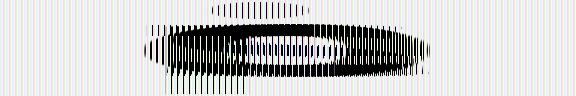

In [20]:
rearrange(ims, '(b1 b2) h w c -> h (w b2 b1) c', b1=2)

<h5>2) Reduce</h5>
<h6>You don need to guess the axis like in torch or numpy</>
<h6>Basics</h6>

In [21]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,4],
    [3,3,3,3]
],dtype=torch.float32)

In [22]:
t

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 4.],
        [3., 3., 3., 3.]])

In [23]:
t.sum(-1)


tensor([ 4., 10., 12.])

In [24]:
t.max()
t.max(dim=0) # max accross the row dimension
t.max(dim=1) # max accross the col dimension

torch.return_types.max(
values=tensor([1., 4., 3.]),
indices=tensor([0, 3, 0]))

In [25]:
t.mean()
t.mean(dim=0)

tensor([2.0000, 2.0000, 2.0000, 2.6667])

In [26]:
X = torch.tensor([[25., 2],[5, 26],[3,7]])
s = len(X[:, 0])
rs = X.sum(dim=0)
m = rs/s
X.mean(axis=0), m, s #mean accross row dimension

(tensor([11.0000, 11.6667]), tensor([11.0000, 11.6667]), 3)

In [27]:
x = torch.randn(3,4,4,5)

In [28]:
x.mean(1)

tensor([[[ 0.5556, -0.1317, -0.4134,  0.0062,  0.9118],
         [ 0.2206, -0.2148,  0.0364,  0.5067, -0.5229],
         [ 0.2301,  0.1636,  0.1812, -0.3748, -0.3013],
         [-0.7980,  0.0348, -0.7479,  0.2239,  0.3199]],

        [[-0.6459, -0.3025, -0.8106,  0.1627,  0.1167],
         [-0.1047, -1.2098, -0.5519,  0.1353,  0.1313],
         [ 0.0096, -0.5764, -0.6660,  0.2218, -0.2947],
         [ 0.1321, -0.5427,  0.5790,  0.5339, -0.5784]],

        [[-0.3415, -0.3785, -0.3709, -0.1671,  0.4113],
         [-0.6340,  0.0539,  0.2657,  0.0877, -0.6075],
         [-0.5780,  0.1751, -0.0388, -0.2336,  0.0428],
         [ 0.6418, -0.7458, -0.3746,  0.2102,  0.7062]]])

In [29]:
#averaing over the channel dimension

reduce(X, 'n m -> m', 'mean') #mean accross row dimension
reduce(X, 'n m -> n', 'mean') #mean accross col dimension
reduce(X, 'n m -> ', 'mean') #mean accross all dimension

tensor(11.3333)

In [30]:
Y = torch.tensor([[[25., 2],[5, 26],[3,7]],[[25., 2],[5, 26],[3,7]]])
reduce(Y, 'b t c -> b', 'mean') # mean over time and channel dimension

tensor([11.3333, 11.3333])

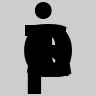

In [31]:
reduce(ims, 'b h w c -> h w', 'min')

In [32]:
# this is mean-pooling with 2x2 kernel
# image is split into 2x2 patches, each patch is averaged
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2).shape

(48, 288, 3)

In [33]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2).shape

(48, 288, 3)

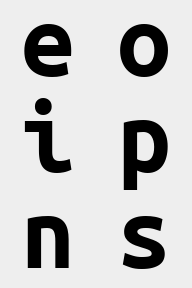

In [34]:
# yet another example. Can you compute result shape?
reduce(ims, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2)

<h4>Stack and concatenate</h4>

In [35]:
# but new axis can appear in the other place:
rearrange(ims, 'b h w c -> h w b c')

<array of shape (96, 96, 6, 3)>


In [44]:
Y

tensor([[[25.,  2.],
         [ 5., 26.],
         [ 3.,  7.]],

        [[25.,  2.],
         [ 5., 26.],
         [ 3.,  7.]]])

In [48]:

rearrange(Y, 'b h w -> b w h')

tensor([[[25.,  5.,  3.],
         [ 2., 26.,  7.]],

        [[25.,  5.,  3.],
         [ 2., 26.,  7.]]])

In [55]:
print(np.stack(Y, axis=0))

[[[25.  2.]
  [ 5. 26.]
  [ 3.  7.]]

 [[25.  2.]
  [ 5. 26.]
  [ 3.  7.]]]


<h4>Addition or removal of axes</h4>

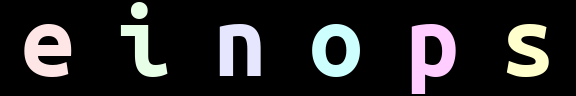

In [58]:
# compute max in each image individually, then show a difference 
x = reduce(ims, 'b h w c -> b () () c', 'max') - ims
rearrange(x, 'b h w c -> h (b w) c')

In [59]:
x = rearrange(ims, 'b h w c -> b 1 h w 1 c') # functionality of numpy.expand_dims
print(x.shape)
print(rearrange(x, 'b 1 h w 1 c -> b h w c').shape) # functionality of numpy.squeeze

(6, 1, 96, 96, 1, 3)
(6, 96, 96, 3)


<h4>Repeating elements</h4>

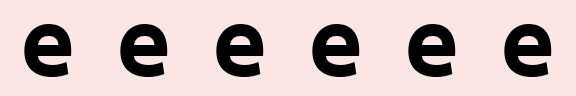

In [62]:
repeat(ims[0], 'h w c -> h (na w) c', na=6)